In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import graphviz
import pydotplus
from IPython.display import Image
from sklearn import tree

In [28]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
# I will use these features
features = ["Pregnancies", "Insulin", "BMI", "Age", "Glucose", "BloodPressure", "DiabetesPedigreeFunction"]
x = data[features]
y = data.Outcome

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print(x_train.head())

     Pregnancies  Insulin   BMI  Age  Glucose  BloodPressure  \
88            15      110  37.1   43      136             70   
467            0      100  36.8   25       97             64   
550            1        0  27.4   21      116             70   
147            2      119  30.5   34      106             64   
481            0        0  35.2   29      123             88   

     DiabetesPedigreeFunction  
88                      0.153  
467                     0.600  
550                     0.204  
147                     1.400  
481                     0.197  


In [31]:
# This is a classification problem. I could also use Logistic Regression. I will use the Decision Tree.

clsfr = DecisionTreeClassifier(criterion="entropy") # object
clsfr =clsfr.fit(x_train, y_train)

pred = clsfr.predict(x_test)
pred_prob = clsfr.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, pred))
print("Accuracy:", metrics.accuracy_score(y_test, pred))
print("Auc Score:", metrics.accuracy_score(y_test, pred_prob))
print("Precission:", metrics.precision_score(y_test, pred))
print("Recall:", metrics.recall_score(y_test, pred))
print("F1 Score:", metrics.f1_score(y_test, pred))


# Gini Outputs
"""
[[113  33]
 [ 44  41]]
Accuracy: 0.6666666666666666
Auc Score: 0.6666666666666666
Precission: 0.5540540540540541
Recall: 0.4823529411764706
F1 Score: 0.5157232704402517
"""

[[117  29]
 [ 31  54]]
Accuracy: 0.7402597402597403
Auc Score: 0.7402597402597403
Precission: 0.6506024096385542
Recall: 0.6352941176470588
F1 Score: 0.6428571428571428


'\n[[113  33]\n [ 44  41]]\nAccuracy: 0.6666666666666666\nAuc Score: 0.6666666666666666\nPrecission: 0.5540540540540541\nRecall: 0.4823529411764706\nF1 Score: 0.5157232704402517\n'

In [32]:
clsfr = DecisionTreeClassifier(criterion="entropy", max_depth=4) # object
clsfr =clsfr.fit(x_train, y_train)

pred = clsfr.predict(x_test)
pred_prob = clsfr.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, pred))
print("Accuracy:", metrics.accuracy_score(y_test, pred))
print("Auc Score:", metrics.accuracy_score(y_test, pred))
print("Precission:", metrics.precision_score(y_test, pred))
print("Recall:", metrics.recall_score(y_test, pred))
print("F1 Score:", metrics.f1_score(y_test, pred))
# Apparently I overfitted before


# Gini outputs
"""[[124  22]
 [ 31  54]]
Accuracy: 0.7705627705627706
Auc Score: 0.7705627705627706
Precission: 0.7105263157894737
Recall: 0.6352941176470588
F1 Score: 0.6708074534161491"""

[[131  15]
 [ 34  51]]
Accuracy: 0.7878787878787878
Auc Score: 0.7878787878787878
Precission: 0.7727272727272727
Recall: 0.6
F1 Score: 0.6754966887417219


'[[124  22]\n [ 31  54]]\nAccuracy: 0.7705627705627706\nAuc Score: 0.7705627705627706\nPrecission: 0.7105263157894737\nRecall: 0.6352941176470588\nF1 Score: 0.6708074534161491'

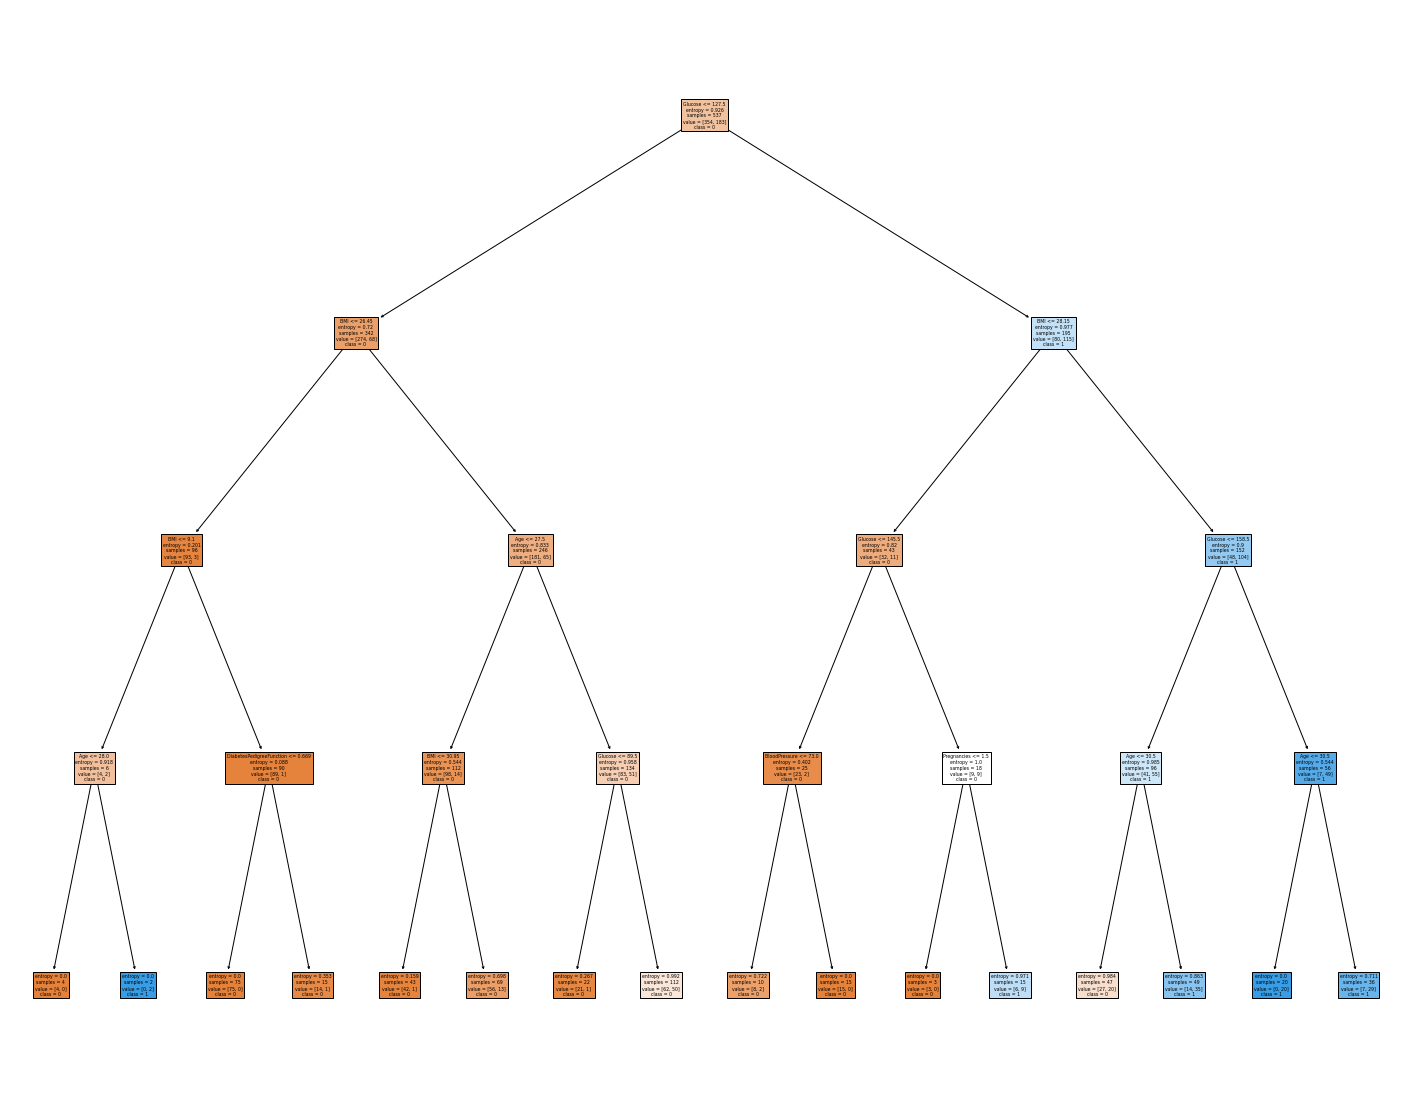

In [33]:
# Plot Method 1   (Matplotlib)
fig = plt.figure(figsize=(25, 20))
a = tree.plot_tree(clsfr, feature_names=features, class_names=["0", "1"], filled=True)

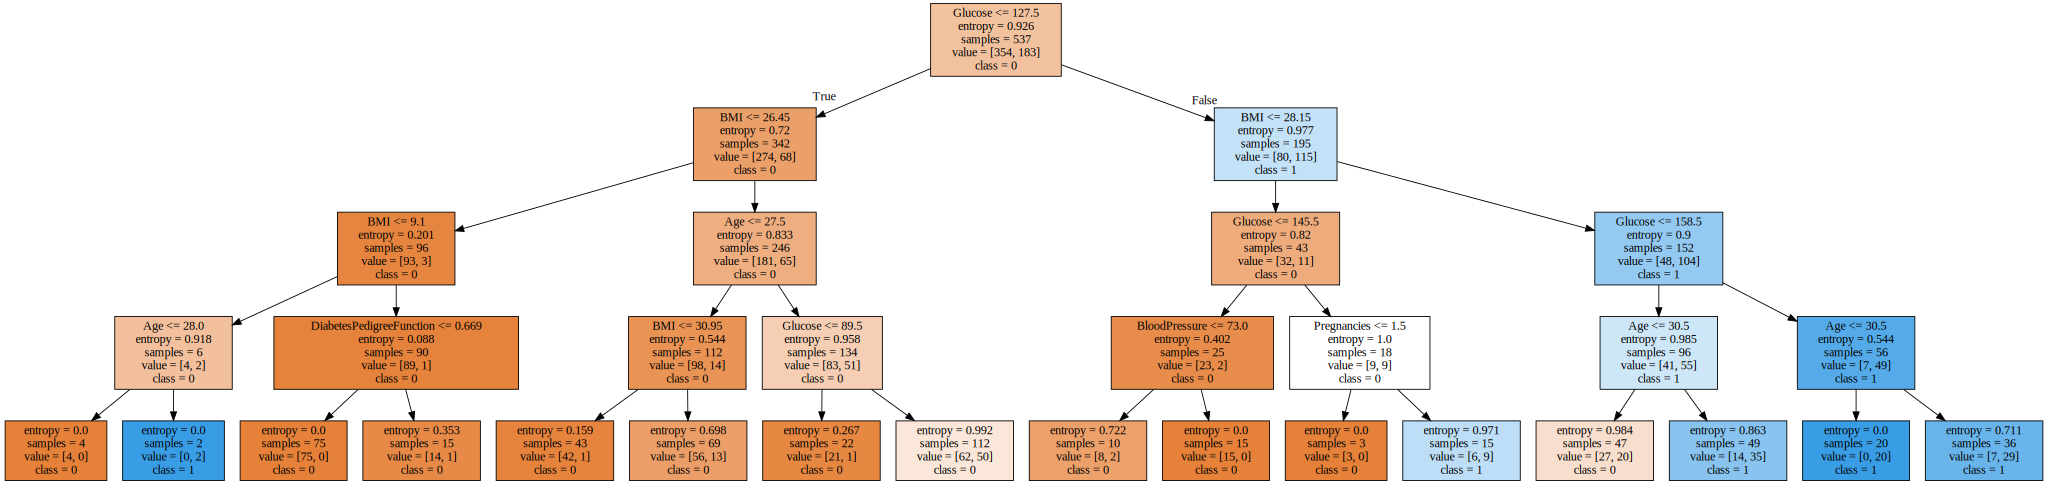

In [34]:
# Plot Method 2  (Graphviz)
dot_dat = tree.export_graphviz(clsfr, out_file=None, feature_names=features, class_names=["0", "1"], filled=True)
graph = graphviz.Source(dot_dat, format="png")
graph

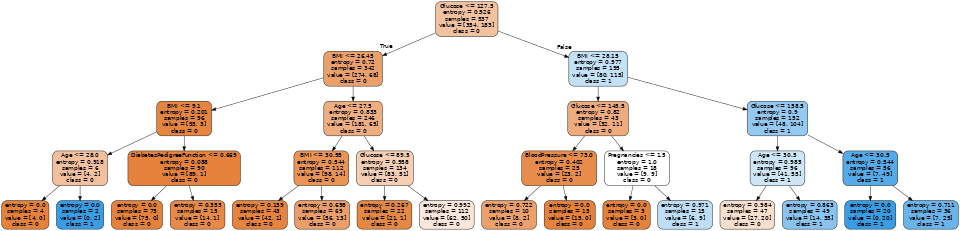

In [35]:
dot_dat = tree.export_graphviz(clsfr, out_file=None, feature_names=features, class_names=["0", "1"], filled=True,
                              rounded=True)

pydot_grp = pydotplus.graph_from_dot_data(dot_dat)
pydot_grp.write_png("orginal_tree.png")
pydot_grp.set_size("10, 10!")
Image(pydot_grp.create_png())

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


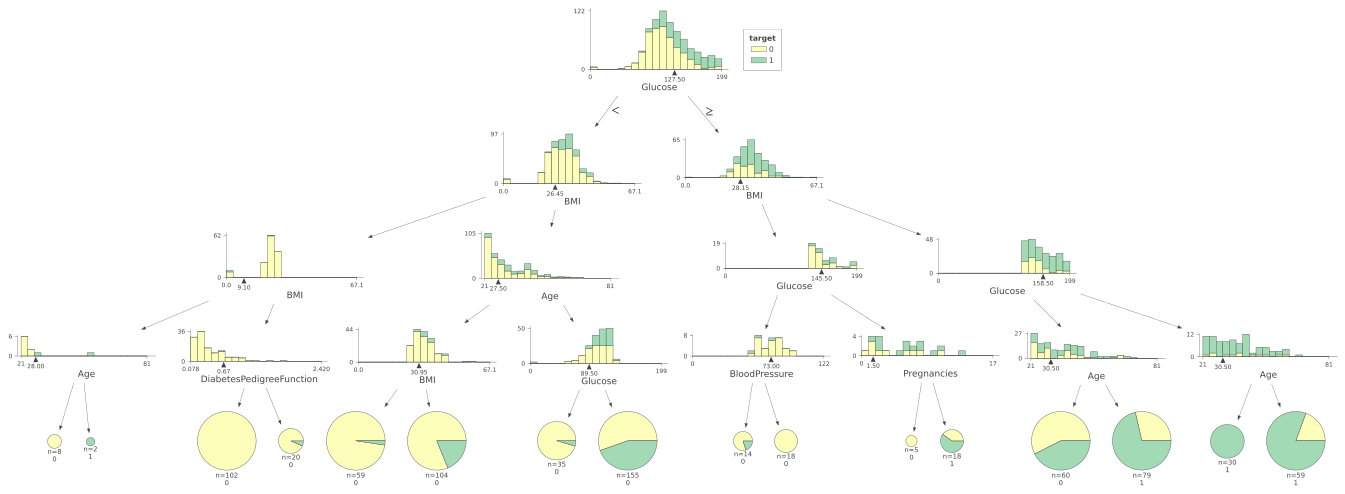

In [36]:
from dtreeviz.trees import dtreeviz
viz = dtreeviz(clsfr, x, y, target_name="target", feature_names=features, class_names=["0", "1"])
viz